In [1]:
import numpy as np

from fpcross import ij, Grid, Solver, Model, Check

ij()

Start |  2:18PM MSK on Feb 14, 2020 | python 3.7.4    |
-------------------------------------------------------


In [2]:
MD = Model.select('fpe_3d_drift_zero')
MD.init(s=1., D=0.5).info()

<div class="head0"><div class="head0__name">fpe_3d_drift_zero</div><div class="head0__note">Three-dimensional Focker Planck equation with the zero drift [FPE, 3D, analytic, time-diffusion].</div></div><div class="head2">
                <div class="head2__name">Parameters</div>
                <div class="head2__note"><ul><li>s =   1.0000 [Initial variance]<div>Variance of the initial condition (type: float, default:   1.0000)</div></li><li>D =   0.5000 [Diffusion coefficient]<div>Scalar diffusion coefficient (type: float, default:   0.5000)</div></li></ul></div>
            </div><div class="head1">
                <div class="head1__name">Description</div>
            </div>
Consider
$$
    d x = f(x, t) \, dt + S(x, t) \, d \beta,
    \quad
    d \beta \, d \beta^{\top} = Q(t) dt,
    \quad
    x(0) = x_0 \sim \rho(x, 0) = \rho_0 (x),
$$
$$
    \frac{\partial \rho(x, t)}{\partial t} =
        \sum_{i=1}^d \sum_{j=1}^d
            \frac{\partial^2}{\partial x_i \partial x_j}
            \left[ D_{ij}(x, t) \rho(x, t) \right]
        - \sum_{i=1}^d
            \frac{\partial}{\partial x_i}
            \left[ f_i(x, t) \rho(x, t) \right],
    \quad
     D(x, t) = \frac{1}{2} S(x, t) Q(t) S(x, t)^{\top},
$$
where spatial $d$-dimensional ($d \ge 1$) variable $x \in R^d$ has probability density function (PDF) $\rho(x, t)$, $\beta$ is Brownian motion of dimension $q$ ($q \ge 1$, and we assume below that $q = d$), $f(x, t) \in R^d$ is a vector-function, $S(x, t) \in R^{d \times q}$ and $Q(t) \in R^{q \times q}$ are matrix-functions and $D(x, t) \in R^{d \times d}$ is a diffusion tensor.

Let
$$
    Q(t) \equiv I,
    \,
    S(x, t) \equiv \sqrt{2 D_c} I
    \implies
    D(x, t) \equiv D_c I,
$$
and
$$
    d = 3,
    \quad
    x \in \Omega,
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    f(x, t) \equiv 0,
    \quad
    \rho_0(x) = \frac{1}{(2 \pi s)^{\frac{3}{2}}}\exp{\left[-\frac{|x|^2}{2s}\right]}.
$$

It can be shown that the analytic solution is
$$
    \rho(x, t) =
        (2 \pi s + 4 \pi D t)^{-\frac{3}{2}}
        \exp{ \left[
            - \frac
                {
                    |x|^2
                }
                {
                    2  s + 4 D t
                }
        \right] },
$$
and the stationary solution ($t \rightarrow \infty$) is
$$
    \rho_{stat}(x) = 0.
$$
        <div class="note">Since interpolation is not required for the case of the zero drift ($f \equiv 0$), but our solver calculates it by design, then it is expected to operate much slower than another simple solvers.</div><div class="end"></div>

In [3]:
SL = Solver(
    TG=Grid(d=1, n=  50, l=[+0., +5.], k='u'),
    SG=Grid(d=3, n=  21, l=[-5., +5.], k='c'),
    MD=MD, eps=1.E-4, with_tt=True
).init({
    'n_hst': 10,
    'with_rhs': False,
    'with_r_hst': False,
}).prep().calc()

Solve: 100%|█| 49/49 [00:39<00:00,  1.23step/s, | At T=5.0e+00 :                                                                                                       Edert=8.0e-02  Ereal=3.1e-01 r=1.00e+00]


------------------ Solver
Format    : 3D, TT, eps= 1.00e-04 [order=2]
Hst pois  : 10 
Hst with r: No 
d r / d t : 8.04e-02
Err  real : 3.12e-01
Time full : 3.98e+01
Time prep : 1.10e-02
Time calc : 3.98e+01
    .init : 4.16e-02
    .prep : 2.12e-04
    .diff : 7.63e-02
    .conv : 3.92e+01
    .post : 5.08e-01
    .last : 6.65e-03



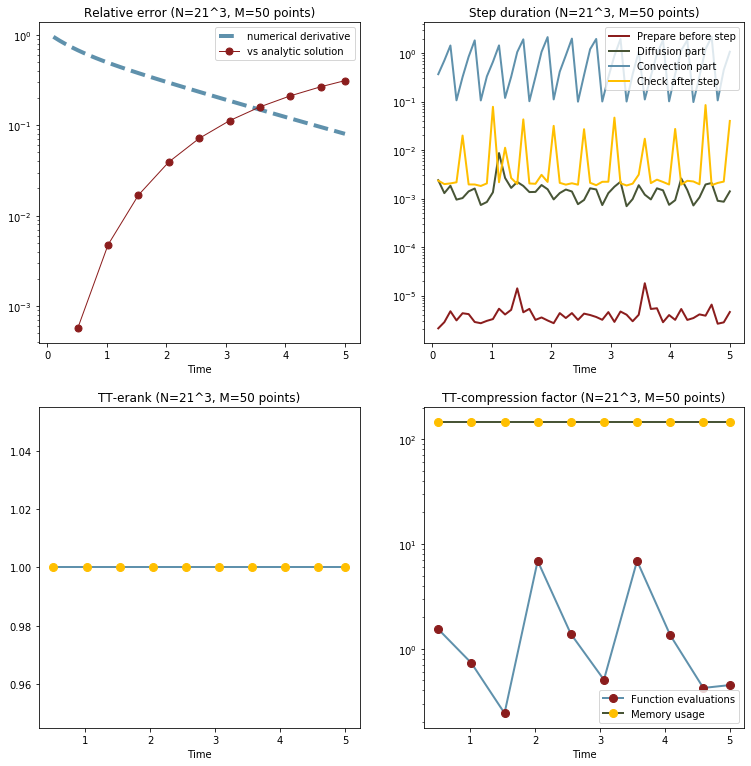

In [4]:
SL.info()
SL.plot()

In [ ]:
opts = { 'is_log': False, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_t([-2.5]*3, opts)
SL.plot_t([+0.0]*3, opts)
SL.plot_t([+2.5]*3, opts)

In [ ]:
opts = { 'is_log': False, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_x(+0.1, opts)
SL.plot_x(+0.5, opts)
SL.plot_x(None, opts)

<div class="head1">
    <div class="head1__name">
        Results for multiple computations
    </div>
    <div class="head1__note">
        We use results that already saved to file (see file `multi_solve.ipynb`).
    </div>
</div>

In [8]:
SLC = SolversCheck('./../computations/data/fpe_3d_drift_zero')
SLC.load()

name1 = 'Solver-NP'
name2 = 'Solver-TT'

M = SLC.res[name2]['M']
N = SLC.res[name2]['N']

m = M[-1]
n = N[-1]

<div class="head2">
    <div class="head2__name">
        Dependence on the number of time points
    </div>
    <div class="head2__note">
        We present results for TT-solver of the 2th order.
    </div>
</div>

In [ ]:
SLC.plot(name2, n=n, is_stat=False, is_xpoi=False, lims={ 'all': [1, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the number of spatial points
    </div>
    <div class="head2__note">
        We present results for TT-solver of the 2th order.
    </div>
</div>

In [ ]:
SLC.plot(name2, m=m, is_stat=False, is_xpoi=False, lims={ 'all': [1, 6] })

<div class="head2">
    <div class="head2__name">
        Dependence on the solver type
    </div>
    <div class="head2__note">
        We present results (dependencies on the number of time and spatial points) for NP-solver and TT-solver.
    </div>
</div>

In [ ]:
SLC.plot_all(n=SLC.res[name1]['N'][-1], is_stat=False, is_xpoi=False)

In [ ]:
SLC.plot_all(m=SLC.res[name1]['M'][-1], is_stat=False, is_xpoi=False)

<div class="head1">
    <div class="head1__name">
        DRAFT | Explicit (simple) solvers
    </div>
    <div class="head1__note">
        Only for example and tests.
    </div>
</div>

In [8]:
import time
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

from intertrain import Intertrain

In [9]:
d = 3
m = t_poi
n = x_poi
l = (x_max - x_min) / (x_poi - 1)
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

I0 = np.eye(n)
J0 = np.eye(n); J0[0, 0] = 0.; J0[-1, -1] = 0. 

J = np.kron(J0, np.kron(J0, J0))

In [10]:
def show_x(X, r_calc, _time):
    X = X.reshape(d, -1)
    r_init = func_r0(X)
    r_real = func_rt(X, t_max)
    r_stat = func_rs(X)
    e = np.linalg.norm(r_real - r_calc) / np.linalg.norm(r_real)
    X = np.arange(X.shape[1])
    
    print('Number of spatial points : %8d^%d'%(x_poi, d))
    print('Number of time points    : %8d'%t_poi)
    print('Error (relative norm)    : %-12.2e'%e)
    print('Total time (sec)         : %-12.2e'%_time)
    print()
    
    plt.plot(
        X.reshape(-1), r_init, '--', label='Initial',
        linewidth=3, color='tab:blue'
    )
    plt.plot(
        X, r_calc, label='Calculated',
        linewidth=1, color='tab:green', marker='o', markersize=7,
        markerfacecolor='lightgreen', markeredgecolor='g'
    )
    plt.plot(
        X, r_real, label='Analytic',
        linewidth=3, color='black'
    )
    plt.plot(
        X, r_stat, '--', label='Stationary',
        linewidth=2, color='magenta'
    )
    
    plt.title('Solution at the final time step')
    plt.xlabel('Point number')
    plt.ylabel('r')
    plt.legend(loc='best')
    plt.show()

    err = np.abs(r_real - r_calc) / np.abs(r_real)
    plt.plot(
        X, err, label='Analytic',
        linewidth=3, color='black'
    )
    plt.semilogy()
    plt.title('Solution error at the final time step')
    plt.xlabel('Point number')
    
    plt.show()

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the forward Euler scheme
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ using standard forward Euler scheme
$$
    r_{k+1} = r_{k} + h D r_{k},
    \quad
    k = 0, 1, \ldots, m-1,
$$
where
$$
    D =
        D_0 \otimes I   \otimes I +
        I   \otimes D_0 \otimes I +
        I   \otimes I   \otimes D_0,
$$
$$
    D_0 = \frac{D_{coef}}{l^2} tridiag \left( 1, -2, 1 \right).
$$

Number of spatial points :       15^3
Number of time points    :      100
Error (relative norm)    : 9.35e-04    
Total time (sec)         : 4.36e+00    



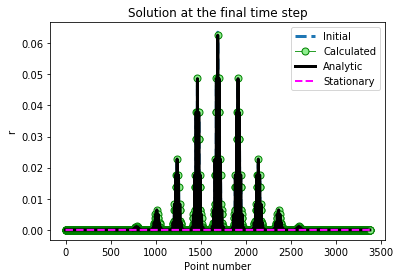

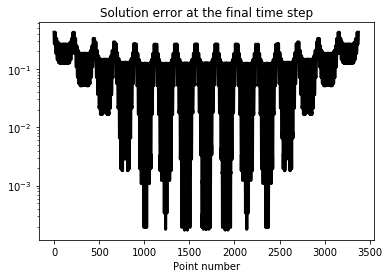

In [11]:
_time = time.time()



X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)
X = [X.copy() for _ in range(d)]
X = np.meshgrid(*X, indexing='ij')
X = np.array(X).reshape((d, -1), order='F')
    
D0 = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D0 = D0 * D_coef / l / l

D = np.zeros((n**d, n**d))
for i in range(d):
    M = [I0] * d; M[i] = D0
    Q = M[0].copy()
    for j in range(1, d):
        Q = np.kron(Q, M[j])
    D+= Q

r = func_r0(X)
for t in T[1:]:
    r = r + h * D @ r

show_x(X, r, time.time() - _time)

<div class="head2">
    <div class="head2__name">
        Chebyshev spatial grid and the matrix exponential
    </div>
</div>

We have
$$
    \frac{\partial r}{\partial t} = D_{coef} \nabla r
$$
or
$$
    \frac{\partial r}{\partial t} = J Z J r,
$$
$$
    J = J_0 \otimes I \otimes I + I \otimes J_0 \otimes I + I \otimes I \otimes J_0,
$$
$$
    Z =
        D_{coef} \cdot
        \left( D \otimes I \otimes I + I \otimes D \otimes I + I \otimes I \otimes D \right),
$$
where $D$ is the 2th order Chebyshev differentiation matrix.

We can solve equation on the Chebyshev spatial grid for the time $t > 0$ using matrix exponential and the 2th order Chebyshev differentiation matrix
$$
    u_{t} = e^{t \cdot D_{coef} \cdot D} u_{0},
$$
where $u_{0}(x)$ is the known initial condition and diffusion matrix is defined as above.



Number of spatial points :       15^3
Number of time points    :      100
Error (relative norm)    : 9.63e-03    
Total time (sec)         : 1.31e+01    



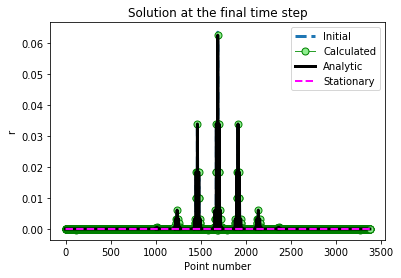

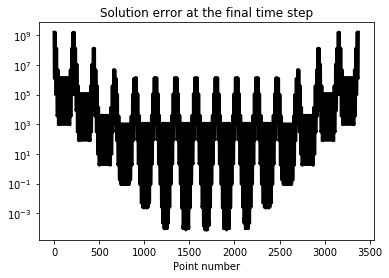

In [12]:
_time = time.time()

IT = Intertrain(n=[x_poi, x_poi, x_poi], l=[[x_min, x_max], [x_min, x_max], [x_min, x_max]])

X = IT.grid()

D0 = IT.dif2() * D_coef

D = np.zeros((n**d, n**d))
for i in range(d):
    M = [I0] * d; M[i] = D0
    Q = M[0].copy()
    for j in range(1, d):
        Q = np.kron(Q, M[j])
    D+= Q

Z = expm((t_max - t_min) * D)

r = func_r0(X)
r = Z @ r

Z1 = Z
show_x(X, r, time.time() - _time)

Number of spatial points :       15^3
Number of time points    :      100
Error (relative norm)    : 9.63e-03    
Total time (sec)         : 1.39e-01    



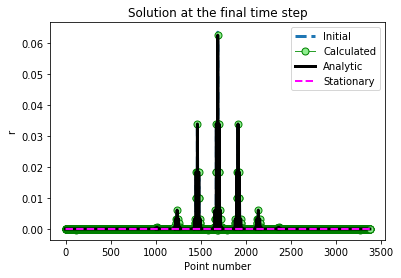

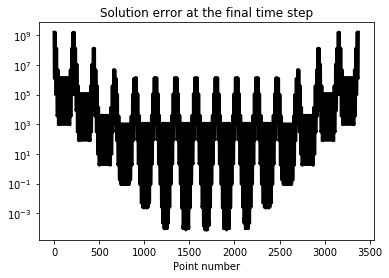

In [13]:
_time = time.time()

IT = Intertrain(n=[x_poi, x_poi, x_poi], l=[[x_min, x_max], [x_min, x_max], [x_min, x_max]])

X = IT.grid()

D0 = IT.dif2() * D_coef

Z0 = expm((t_max - t_min) * D0)

Z = Z0.copy()
for _ in range(1, d): Z = np.kron(Z, Z0)

r = func_r0(X)
r = Z @ r

Z2 = Z
show_x(X, r, time.time() - _time)

<div class="head1">
    <div class="head1__name">
        Multiple computations
    </div>
    <div class="head1__note">
        We compute dependencies of solution accuracy and calculation time on the number of time and spacial points and solver type. Results are saved to file and may be reused later for visualization.  
    </div>
</div>

In [ ]:
if False: # Protection of already saved data
    SLC = SolversCheck(data_path)
    SLC.set_grid_t(t_min, t_max)
    SLC.set_grid_x(x_min, x_max)
    SLC.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
    SLC.set_coefs(D_coef)

    M = [10, 100, 1000]
    N = list(np.arange(5, 16, 5, dtype=int))
    SLC.add(name='Solver-NP', d=3, eps=1.E-6, ord=2, with_tt=False, M=M, N=N)

    M = [10, 100, 1000, 10000]
    N = list(np.arange(5, 26, 5, dtype=int))
    SLC.add(name='Solver-TT', d=3, eps=1.E-6, ord=2, with_tt=True, M=M, N=N)

    SLC.calc()
    SLC.save()

<div class="end"></div>